## High-z galaxies with Te measurements

# Determine electron temperature, density and extinction and de-redden fluxes

In [1]:
## Global stuff
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
from astropy.table import Table

## Lines to be used
line_names = ['OIII1661','OIII1666','NIII1750','CIII1907','CIII1909','NeIII3869','OII3727','OII3729','OIITot',
              'Hd','Hg','OIII4363','Hb','OIII4959','OIII5007','Ha','NII6584']

colors = plt.get_cmap('cubehelix')(np.linspace(0.1, 0.8, 16))


#Probably there is a smart way of doing this with PyNeb
super_wav = {
    'OIII1661': 1661,
    'OIII1666': 1666,
    'NIII1750': 1750,
    'CIII1907': 1907,
    'CIII1909': 1909,
    'NeIII3869': 3869,
    'OII3727': 3727,
    'OII3729': 3729,
    'OIITot': 3729,
    'Hd': 4102,
    'Hg': 4340,
    'OIII4363': 4363,
    'Hb': 4861,
    'OIII4959': 4959,
    'OIII5007': 5007,
    'Ha': 6563,
    'NII6584': 6584
    }

# Quick look at all fluxes

In [2]:
# Load data
fluxes = Table.read('../Data/data.dat',format='ascii.fixed_width_two_line')
fluxes.show_in_notebook()

idx,Name,z,Ref,OIII1661,OIII1666,NIII1750,CIII1907,CIII1909,NeIII3869,OII3727,OII3729,OIITot,Hd,Hg,OIII4363,Hb,OIII4959,OIII5007,Ha,NII6584,eOIII1661,eOIII1666,eNIII1750,eCIII1907,eCIII1909,eNeIII3869,eOII3727,eOII3729,eOIITot,eHd,eHg,eOIII4363,eHb,eOIII4959,eOIII5007,eHa,eNII6584
0,CSWA20,1.433,James2014,0.04,0.1,nan,0.12,0.11,0.37,0.47,0.52,0.47,nan,0.57,0.05,1.0,1.67,4.97,3.32,0.06,0.04,0.04,nan,0.01,0.01,0.02,0.02,0.03,0.2,nan,0.05,0.03,0.07,0.1,0.29,0.2,0.02
1,Abell_860_359,1.702,Stark2014,0.03,0.083,0.03,nan,nan,nan,nan,nan,1.2,nan,nan,nan,1.0,2.03,6.12,2.97,nan,nan,0.029,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.03,0.03,0.1,0.03,nan
2,Abell_22.3,1.703,Yuan2009,nan,nan,nan,nan,nan,nan,nan,nan,1.11,nan,nan,0.27,1.0,1.98,6.45,5.03,0.05,nan,nan,nan,nan,nan,nan,nan,nan,0.3,nan,nan,0.1,0.1,0.3,0.3,0.4,nan
3,RCSGA,1.7037,Rigby2011,nan,nan,nan,nan,nan,7.8,nan,nan,72.0,7.1,13.5,1.5,32.4,49.3,159.0,116.0,7.4,nan,nan,nan,nan,nan,1.3,nan,nan,0.2,1.7,2.0,nan,1.1,1.6,1.4,1.2,1.2
4,A1689_31.1,1.8,"Christensen2012a,b",3.2,7.4,nan,4.7,9.1,6.4,9.2,11.7,20.9,nan,17.0,6.2,42.7,63.0,211.5,nan,nan,0.4,0.3,nan,0.4,0.4,2.5,0.8,0.9,1.7,nan,2.1,1.8,4.9,10.6,5.7,nan,nan
5,SMACS_0304,1.963,"Christensen2012a,b",0.014,0.023,nan,nan,nan,0.2998,0.8756,1.1744,2.1,0.257,0.412,nan,1.0,1.339,4.714,3.604,0.116,0.003,0.004,nan,nan,nan,3.8,3.4,3.9,0.02,0.005,0.003,nan,0.002,0.004,0.007,0.001,0.005
6,MACS_0451,2.06,Stark2014,0.2,0.3,0.1,nan,nan,nan,nan,nan,0.63,nan,nan,nan,1.0,1.37,3.95,2.58,0.065,0.1,0.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.05,0.05,0.16,nan
7,COSMOS_12805,2.159,Kojima2017,0.049,0.075,0.042,nan,nan,nan,nan,nan,2.9,nan,nan,nan,1.0,1.89,6.46,2.84,0.1,0.012,0.015,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.3,0.42,0.29,0.05,nan
8,BX660,2.174,Erb2016,0.0,0.21,nan,nan,nan,nan,nan,nan,0.87,nan,nan,nan,1.0,3.2,6.4,2.77,0.07,0.0,0.04,nan,nan,nan,nan,nan,nan,0.04,nan,nan,nan,0.2,0.8,0.3,0.2,nan
9,BX74,2.189,Erb2016,0.0,0.12,nan,nan,nan,nan,nan,nan,1.01,nan,nan,nan,1.0,2.47,7.9,3.46,0.12,0.0,0.01,nan,nan,nan,nan,nan,nan,0.04,nan,nan,nan,0.3,1.52,1.0,0.25,0.03


# Extinction correction, temperature and density

    Theoretical Balmer ratios depend on the temperature and density. Calculate temperature, density and extinction  at the same time
    
    
#### interesting diagnostics for this work:
1. Temperature
    - "[OIII] 1666/5007" : ('O3', 'L(1666)/L(5007)', 'RMS([E(5007), E(1666)])')
    - "[OIII] 4363/5007" : ('O3', 'L(4363)/L(5007)', 'RMS([E(5007), E(4363)])')
2. Density
    - "[OII] 3726/3729" : ('O2', 'L(3726)/L(3729)', 'RMS([E(3729), E(3726)])')
    - "[CIII] 1909/1907" : ('C3', 'L(1909)/L(1907)', 'RMS([E(1909), E(1907)])')
    

## Some tests to see how line ratios vary with temperature and density using Pyneb

Test the temperature indicators sensitivity to density and the variation of the Balmer ratios with temperature and density

<IPython.core.display.Javascript object>


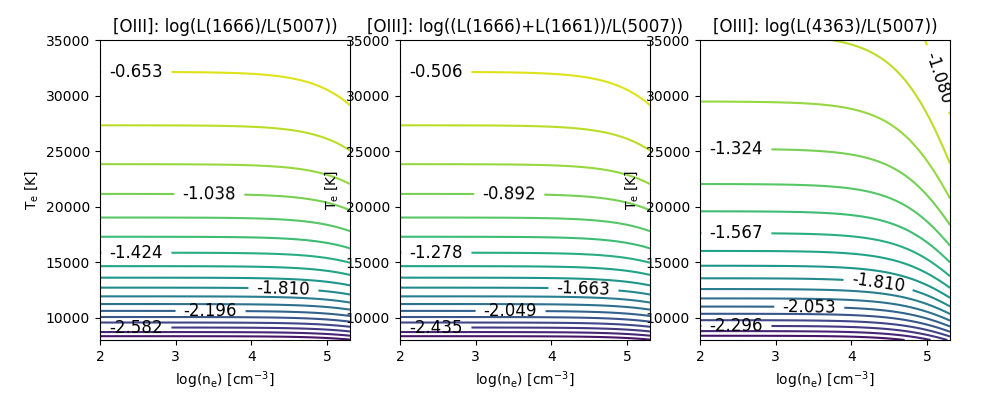

In [3]:
import pyneb as pn
pn.atomicData.setDataFile('o_iii_coll_AK99.dat') # have to change because the default ones do not have level6

fig, ax = plt.subplots(1,3,figsize=(10,4))
plt.subplots_adjust(left=0.1,right=0.95,top=0.9,bottom=0.15)

##"[OIII] 1666/5007" 
o3grid = pn.EmisGrid('O', 3, n_tem=200, n_den=200, tem_min=8000, tem_max=35000, den_min=100, den_max=2.e5)
o3grid.plotContours(to_eval='L(1666)/L(5007)', cblabel='I(1666)/I(5007)',ax=ax[0])

##"[OIII] (1666+1661)/5007" 
o3grid = pn.EmisGrid('O', 3, n_tem=200, n_den=200, tem_min=8000, tem_max=35000, den_min=100, den_max=2.e5)
o3grid.plotContours(to_eval='(L(1666)+L(1661))/L(5007)', cblabel='(I(1666)+I(1661))/I(5007)',ax=ax[1])

##"[OIII] 4363/5007" 
o3grid = pn.EmisGrid('O', 3, n_tem=200, n_den=200, tem_min=8000, tem_max=35000, den_min=100, den_max=2.e5)
o3grid.plotContours(to_eval='L(4363)/L(5007)', cblabel='I(4363)/I(5007)',ax=ax[2])

<IPython.core.display.Javascript object>


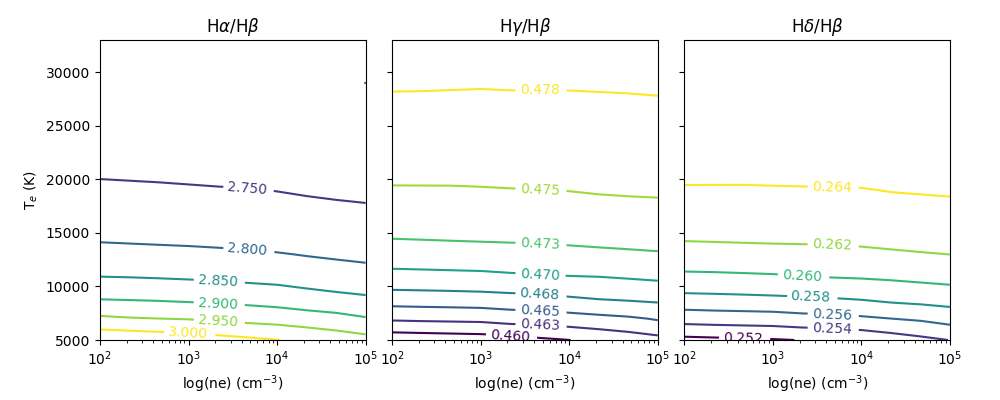

[]

In [4]:
# Balmer lines sensitive to temperature and density?
def Ha_Hb_ratio(tem,den):
    H1=pn.RecAtom('H', 1)    
    emis1 = H1.getEmissivity(tem, den, wave = 4861)
    emis2 = H1.getEmissivity(tem, den, wave = 6563)
    return emis2 / emis1

def Hg_Hb_ratio(tem,den):
    H1=pn.RecAtom('H', 1)    
    emis1 = H1.getEmissivity(tem, den, wave = 4861)
    emis2 = H1.getEmissivity(tem, den, wave = 4340)
    return emis2 / emis1

def Hd_Hb_ratio(tem,den):
    H1=pn.RecAtom('H', 1)    
    emis1 = H1.getEmissivity(tem, den, wave = 4861)
    emis2 = H1.getEmissivity(tem, den, wave = 4102)
    return emis2 / emis1

den_range = np.logspace(2.,5.,num=10)
tem_range = np.arange(5000,35000,2000)
xx, yy = np.meshgrid(den_range, tem_range,sparse=True)

fig, ax = plt.subplots(1,3,figsize=(10,4))
plt.subplots_adjust(left=0.1,right=0.95,top=0.9,bottom=0.15,wspace=0.1)

ax[0].set_title('H$\\alpha$/H$\\beta$')
ax[0].set_xlabel('log(ne) (cm$^{-3}$)')
ax[0].set_ylabel('T$_e$ (K)')
ax[0].set_xscale("log", nonposx='clip')
c1 = ax[0].contour(den_range,tem_range,Ha_Hb_ratio(yy,xx))
plt.clabel(c1, inline=1, fontsize=10)

ax[1].set_title('H$\gamma$/H$\\beta$')
ax[1].set_xlabel('log(ne) (cm$^{-3}$)')
ax[1].set_xscale("log", nonposx='clip')
c2 = ax[1].contour(den_range,tem_range,Hg_Hb_ratio(yy,xx))
plt.clabel(c2, inline=1, fontsize=10)
ax[1].set_yticklabels('')

ax[2].set_title('H$\delta$/H$\\beta$')
ax[2].set_xlabel('log(ne) (cm$^{-3}$)')
ax[2].set_xscale("log", nonposx='clip')
c3 = ax[2].contour(den_range,tem_range,Hd_Hb_ratio(yy,xx))
plt.clabel(c3, inline=1, fontsize=10)
ax[2].set_yticklabels('')

## Test which diagnostics are available for each galaxy

(without correcting for reddening, these values are not correct)

In [5]:
import pyneb as pn # This is the python code done from the IRAF routines
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

diags = pn.Diagnostics()
pn.atomicData.setDataFile('o_iii_coll_AK99.dat') # have to change because the default ones do not have level6
O3 = pn.Atom('O', 3)
O2 = pn.Atom('O', 2)
C3 = pn.Atom('C', 3)

fluxes = Table.read('../Data/data.dat',format='ascii.fixed_width_two_line')

print('                  \t Temperature \t   Density')
print('              Name\t4363\t1666\t1907\t3727')
for f in fluxes:
    print('%20s\t%0.0f\t%0.0f\t%0.0f\t%0.0f'
          %(f['Name'],
            O3.getTemDen(int_ratio=f['OIII4363']/f['OIII5007'], den=100., wave1=4363, wave2=5007),
            O3.getTemDen(int_ratio=f['OIII1666']/f['OIII5007'],den=100,wave1=1666, wave2=5007),
            C3.getTemDen(int_ratio=f['CIII1907']/f['CIII1909'], tem=14000., wave1=1907, wave2=1909),
            O2.getTemDen(int_ratio=f['OII3727']/f['OII3729'],tem=14000,wave1=3727,wave2=3729)
           ))

                  	 Temperature 	   Density
              Name	4363	1666	1907	3727
              CSWA20	11505	13500	15846	429
       Abell_860_359	nan	12347	nan	nan
          Abell_22.3	22973	nan	nan	nan
               RCSGA	11252	nan	nan	nan
          A1689_31.1	18389	15537	78167	199
          SMACS_0304	nan	10121	nan	127
           MACS_0451	nan	19754	nan	nan
        COSMOS_12805	nan	11947	nan	nan
               BX660	nan	15272	nan	nan
                BX74	nan	12657	nan	nan
               BX418	nan	13770	nan	nan
           S16-stack	12908	10414	1913	518
         COSMOS-1908	14029	nan	nan	640
        the_Lynx_arc	nan	17301	1753	nan
          SMACS_2031	nan	16462	2600	483
           SGAS_1050	7113	10602	nan	685


# Summary

#### Diagnostics to be used in each galaxy:
        0: [OIII] 1666/5007, [CIII] 1909/1907
        1: [OIII] 4363/5007, [CIII] 1909/1907
        2: [OIII] 1666/5007, [OII] 3726/3729
        3: [OIII] 4363/5007, [OII] 3726/3729
        4: [OIII] 1666/5007
        5: [OIII] 4363/5007

When several diganostics for temperature are available choose OIII4363 over OII1666 since it is closer to 5007, so less sensitive to reddening.
When several diganostics for density are available, choose 3727 (redenning is easier to get right close to the balmer lines?)

For SGAS_1050 and the Steidel stack, OIII4363 only has an upper limit. So Use OII1666
RCSGA also only has an upper limit fot OIII4363, but no other lines. Assume that the error is 20% of the line flux (Not very scientific...)

| Galaxy        | Tem       | Den       | Diagn |
| ------------- |:---------:| ---------:| -----:| 
|       CSWA20  | 4363,1666 | 1907,3727 |   3   |
|    (USD-12539)  | 4363      | 3727      |   (3) |
|     (UDS-6377)  | ???       | None      |   ?   |
|Abell_860_359  | 1666      | None      |   4   |
|   Abell_22.3  | 4363      | None      |   5   |
|        RCSGA  | 4363      | None      |   5   |
|   A1689_31.1  | 4363      | 1907,3727 |   3   |
| (SL2SJ0217)     | 4363,1666 | 1907      |   0   |
|   SMACS_0304  | 1666      | 3727      |   2   |
|    MACS_0451  | 1666      | None      |   4   |
| COSMOS_12805  | 1666      | None      |   4   |
|        BX660  | 1666      | None      |   4   |
|         BX74  | 1666      | None      |   4   |
|        BX418  | 1666      | None      |   4   |
|    S16-stack  | 4363,1666 | 1907,3727 |   2   |
|  COSMOS-1908  | 4363      | 3727      |   3   |
| lynx arc      | 39994     | 1907      |   0   |
| SMACS2031     | 16462     |1907,3727  |   2   |
|    SGAS_1050  | 4363      | 3727      |   2   |


Diagnostics

    diagnostics = [3,4,5,5,3,2,4,4,4,4,4,2,3,0,2,2]

** Something wrong with 4683 of [12] USD-6377 **

In [6]:
diagnostics = [3,4,5,5,3,2,4,4,4,4,4,2,3,0,2,2]

## Functions to calculate temperature, density, and extinction

In [7]:
import pyneb as pn 

diags = pn.Diagnostics()

pn.atomicData.setDataFile('o_iii_coll_AK99.dat') # have to change because the default ones do not have level 6
O3 = pn.Atom('O', 3)
  
def select_diagnostic(select,tem,den,code):
    idx = np.where(code==select)
    if len(idx)>0: 
        return tem[idx],den[idx],code[idx]
    else:
        return np.nan 

def calculate_tem_den(f,den=100.,select=range(6)):
    """ Calculate temperature and density no matter what and, at the end, select the ones 
    that are not nans.
    Parameters:
    -----------
    flux: dictionary
        dictionary with line_name:flux
    den: float
        if no density diagnostic is available, use this density
    select:
        returns only the temperature and densities associated with the chose diagnostics 
        0: [OIII] 1666/5007, [CIII] 1909/1907
        1: [OIII] 4363/5007, [CIII] 1909/1907
        2: [OIII] 1666/5007, [OII] 3726/3729
        3: [OIII] 4363/5007, [OII] 3726/3729
        4: [OIII] 1666/5007
        5: [OIII] 4363/5007
    Returns:
    --------
    tem, den, code: float,float,int
        temperature, density and code for which 
    """
    # Diagnostics of both temperature and density
    tem10, den10 = diags.getCrossTemDen('[OIII] 1666/5007', '[CIII] 1909/1907', 
                                    f['OIII1666']/f['OIII5007'], f['CIII1909']/f['CIII1907']) 
    tem11, den11 = diags.getCrossTemDen('[OIII] 4363/5007', '[CIII] 1909/1907', 
                                            f['OIII4363']/f['OIII5007'],f['CIII1909']/f['CIII1907'])
    
    tem12, den12 = diags.getCrossTemDen('[OIII] 1666/5007', '[OII] 3726/3729',
                                 f['OIII1666']/f['OIII5007'], f['OII3727']/f['OII3729'])

    tem13, den13 = diags.getCrossTemDen('[OIII] 4363/5007', '[OII] 3726/3729',
                                 f['OIII4363']/f['OIII5007'], f['OII3727']/f['OII3729'])
    
    # If only temperature available, assume a density    
    den20 = den

    tem20 = O3.getTemDen(int_ratio=f['OIII1666']/f['OIII5007'], den=den20, wave1=1666, wave2 = 5007)
          
    tem21 = O3.getTemDen(int_ratio=f['OIII4363']/f['OIII5007'], den=den20, wave1=4363, wave2 = 5007)

    # Select output        
    all_tem = np.array((tem10,tem11,tem12,tem13,tem20,tem21))
    all_den = np.array((den10,den11,den12,den13,den20,den20))
    all_codes = np.array((  0,   1,   2,   3, 4, 5))
    select = np.array(select)
    return all_tem[select],all_den[select],all_codes[select]

In [8]:
# Extinction functions
H1=pn.RecAtom('H', 1)

def Ha_over_Hb(f,tem,den):
    """Function to compute Balmer line ratio. 
    Adapted from PYNEB manual (PG 58)
    """    
    wave2,I_obs2 = 4861 , f['Hb'] 
    
    if np.isfinite(f['Ha']):
        wave1,I_obs1 = 6563., f['Ha']
        emis1 = H1.getEmissivity(tem, den, wave = wave1)
        emis2 = H1.getEmissivity(tem, den, wave = wave2)
        return emis1 / emis2, I_obs1/I_obs2, wave1, wave2

    else:
        return np.nan,np.nan,6563,4861
    
    
def Hg_over_Hb(f,tem,den):
    """Function to compute Balmer line ratio. 
    Adapted from PYNEB manual (PG 58)
    """    
    wave2,I_obs2 = 4861 , f['Hb'] 

    if np.isfinite(f['Hg']):
        wave1,I_obs1 = 4340, f['Hg']
        
        emis1 = H1.getEmissivity(tem, den, wave = wave1)
        emis2 = H1.getEmissivity(tem, den, wave = wave2)
        return emis1 / emis2, I_obs1/I_obs2,wave1, wave2

    else:
        return np.nan,np.nan,4340,4861
    
    
def Hd_over_Hb(f,tem,den):
    """Function to compute Balmer line ratio. 
    Adapted from PYNEB manual (PG 58)
    """
    wave2,I_obs2 = 4861 , f['Hb'] 
    
    if np.isfinite(f['Hd']):
        wave1,I_obs1 = 4102, f['Hd']
        
        emis1 = H1.getEmissivity(tem, den, wave = wave1)
        emis2 = H1.getEmissivity(tem, den, wave = wave2)
        return emis1 / emis2, I_obs1/I_obs2,wave1, wave2

    else:
        return np.nan,np.nan,4102,4861

def calc_EBV(obs_over_theo,wave1,wave2):
    COR = pn.RedCorr(E_BV= -2.5,  law='CCM89')
    f1 = np.log10(COR.getCorr(wave1))
    f2 = np.log10(COR.getCorr(wave2))
    return float(2.5 * np.log10(obs_over_theo) / (f1 - f2))


def mean_EBV(f,tem,den):
    """Calculates the mean EBV using all available lines
    """
    theo_ha_hb, obs_ha_hb, wave1, wave2 = Ha_over_Hb(f,tem,den)
    EBV_ha = calc_EBV(obs_ha_hb/theo_ha_hb, wave1, wave2)    
    theo_hg_hb, obs_hg_hb, wave1, wave2 = Hg_over_Hb(f,tem,den)
    EBV_hg = calc_EBV(obs_hg_hb/theo_hg_hb, wave1, wave2)
    theo_hd_hb, obs_hd_hb, wave1, wave2 = Hd_over_Hb(f,tem,den)
    EBV_hd = calc_EBV(obs_hd_hb/theo_hd_hb, wave1, wave2)
    wgh = np.array((f['Ha']/f['Hb'] * np.array(f['eHa']/f['Ha']**2 + f['eHb']/f['Hb']**2 ),
                   f['Hg']/f['Hb'] * np.array(f['eHg']/f['Hg']**2 + f['eHb']/f['Hb']**2 ),
                   f['Hd']/f['Hb'] * np.array(f['eHd']/f['Hd']**2 + f['eHb']/f['Hb']**2 )))
    
    
    # Sometimes some of them are negative. If so, discard them
    # Same thing if there are nan values
    all_EBV = np.array((EBV_ha,EBV_hg,EBV_hd))
    wgh = wgh[np.where(all_EBV>=0) or np.isfinite(all_EBV)]
    all_EBV = all_EBV[np.where(all_EBV>=0) or np.isfinite(all_EBV)]
    
    if all_EBV.size == 0: # if empty
        return 0.
    else:
        return np.average(all_EBV,weights=1./wgh)
        #return np.mean(all_EBV)
    
def dered_line_fluxes(f,tem,den):
    """ Calculates the extinction from a Balmer ratio (theoretical value calculated for
    that particular temperature and density).
    Parameters:
    -----------
    flux: dictionary
        dictionary with line_name:flux
    tem: float
        temperature
    den: float
        density
    Returns:
    --------
    dered_flux: dict
        dictionary with derened fluxes (equivalent to f)
    E(B-V): float
        Extinction used to correct fluxes
    """
    # Calculate E(B-V) for this temperature and density. 
    # Define the extinction law. Type "pn.RedCorr().getLaws()" to get all of them
    # Use all the Balmer ratios available
    
    rc = pn.RedCorr(law='CCM89')
    rc.R_V = 4.05 # Calzetti 2000
    ebv =  mean_EBV(f,tem,den)
    rc.E_BV = ebv

    # Deredden line using the obs class
    new_f = {}
    for line in line_names:
        new_f[line] = f[line] * rc.getCorrHb(super_wav[line])

    return new_f,rc.E_BV

## Calculate temperature and extinction (worry about error bars later)
        
    1) Assume a temperature and density (use as firt guess the redden data)
    3) Calculate the Balmer ratio
    4) De-reden the lines 
    5) Recalculate temperature and density to check if it is compatible (assume it is fine when 
    the difference between the temperature before and after de-reddening is less than 50 K)
    

In [9]:
# Load data
fluxes = Table.read('../Data/data.dat',format='ascii.fixed_width_two_line')

for f,diag in zip(fluxes,diagnostics):
    
    print('**************** GALAXY: %s ****************'%f['Name'])
    init_tem,init_den,code = calculate_tem_den(f,select=diag)
    dered_f,ebv = dered_line_fluxes(f,init_tem,init_den)
    print('Initial temperature and density: %d K\t %d cm^-3'%(init_tem,init_den))
    print('Initial extinction: %0.3f'%(ebv))

    c = 0
    while True:
        c+=1 # Abell_22.3 did not converge, so I've limited the number or iterations
        # Deredden lines
        dered_f,ebv = dered_line_fluxes(f,init_tem,init_den)
        # Recalculate temperature
        new_tem,new_den,code = calculate_tem_den(dered_f,select=diag)
        # Check if the solution is ok
        if np.abs(init_tem - new_tem) >50 and c<11:
            init_tem = new_tem
        else:
            print('Updated temperature and density: %d K\t %d cm^-3'%(new_tem,new_den))
            print('Updated extinction: %0.3f'%(ebv))
            print('Converged after %d iterations\n\n'%c)
            break

**************** GALAXY: CSWA20 ****************
Initial temperature and density: 11496 K	 404 cm^-3
Initial extinction: 0.159
Updated temperature and density: 11908 K	 408 cm^-3
Updated extinction: 0.162
Converged after 2 iterations


**************** GALAXY: Abell_860_359 ****************
Initial temperature and density: 12347 K	 100 cm^-3
Initial extinction: 0.051
Updated temperature and density: 12780 K	 100 cm^-3
Updated extinction: 0.053
Converged after 2 iterations


**************** GALAXY: Abell_22.3 ****************
Initial temperature and density: 22972 K	 100 cm^-3
Initial extinction: 0.615
Updated temperature and density: 31191 K	 100 cm^-3
Updated extinction: 0.615
Converged after 11 iterations


**************** GALAXY: RCSGA ****************
Initial temperature and density: 11252 K	 100 cm^-3
Initial extinction: 0.230
Updated temperature and density: 11823 K	 100 cm^-3
Updated extinction: 0.233
Converged after 2 iterations


**************** GALAXY: A1689_31.1 *********

## Estimate errors

Pyned doesn't handle errors in tempererature and density solutions (for now). Better to use Monte Carlo (With 500 iterations takes a long time to run, **about 2 hours!!**)

In [15]:
import pickle
import timeit

# Import data
fluxes = Table.read('../Data/data.dat',format='ascii.fixed_width_two_line')

# Monte Carlo stuff
MC_steps = 500
t_precision = 50 
def perturbed_lines(f):
    ''' Return a new line flux dictionary with the original fluxes perturbed 
    within the observational error. If line is only an upper limit, does not 
    vary it an prints that info'''
    np.random.seed()
    new_lines = {}
    for line in line_names:
        if np.isfinite(f[line]) and np.isfinite(f['e'+line]):
            new_lines[line] = np.random.normal(f[line],f['e'+line])
        else:
            new_lines[line] = f[line]
    # Add balmer line errors (the only ones used in this process to calculate the weighted E(B-V))
    new_lines['eHa'] = f['eHa']
    new_lines['eHb'] = f['eHb']
    new_lines['eHg'] = f['eHg']
    new_lines['eHd'] = f['eHd']

    return new_lines

for f,diag in zip(fluxes[6:7],diagnostics[6:7]):

    print('**************** GALAXY: %s ****************'%f['Name'])
    start_time = timeit.default_timer()
    MC_tem = []
    MC_ebv = []
    MC_den = []
    
    for i in range(MC_steps):
        f2 = perturbed_lines(f)
        init_tem = 0
        new_tem,new_den,code = calculate_tem_den(f2,select=diag)
        c=0
        while np.abs(init_tem-new_tem) > t_precision and c<4:
            c+=1
            init_tem = new_tem
            dered_f,ebv = dered_line_fluxes(f2,init_tem,new_den)
            new_tem,new_den,code = calculate_tem_den(dered_f,select=diag)

        # Keep values
        MC_ebv.append(float(ebv))
        MC_tem.append(float(new_tem))
        MC_den.append(float(new_den))
    
    # turn into array and clean from nan
    MC_tem = np.array(MC_tem)[~np.isnan(MC_tem)]
    MC_ebv = np.array(MC_ebv)[~np.isnan(MC_ebv)]
    MC_den = np.array(MC_den)[~np.isnan(MC_den)]

    # Printing results
    print('Temperature: %d +/- %d K'%(np.mean(MC_tem),np.std(MC_tem)))
    print('Density : %d +/- %d cm^-3'%(np.mean(MC_den),np.std(MC_den)))
    print('E(B-V): %0.3f +/- %0.3f'%(np.mean(MC_ebv),np.std(MC_ebv)))
    print('Execution time: %d s\n\n'%(timeit.default_timer() - start_time))
    # Dump to file
    with open('tem_and_ebv_samples/'+f['Name']+'_tem_and_ebv.pickle', 'wb') as fp:
        out = {}
        out['tem'] = MC_tem
        out['den'] = MC_den
        out['ebv'] = MC_ebv
        pickle.dump(out, fp)

**************** GALAXY: SL2SJ0217 ****************


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


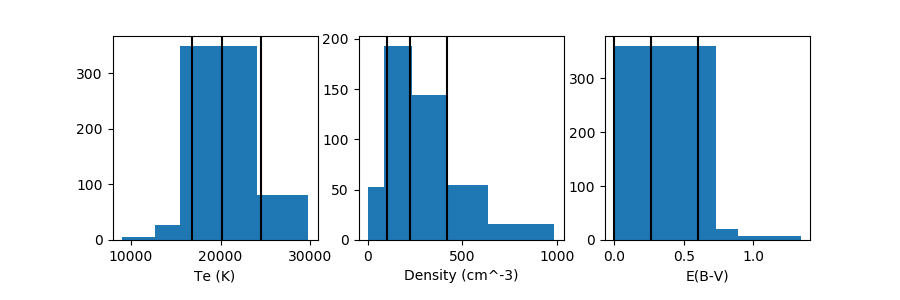

<IPython.core.display.Javascript object>


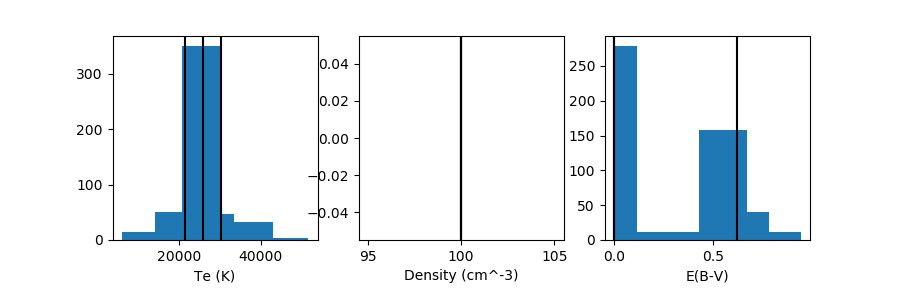

<IPython.core.display.Javascript object>


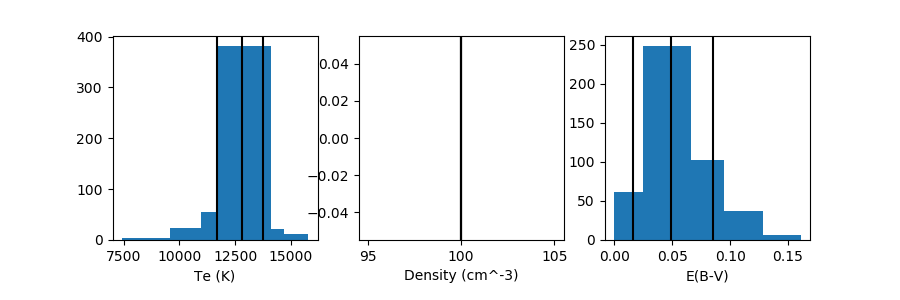

<IPython.core.display.Javascript object>


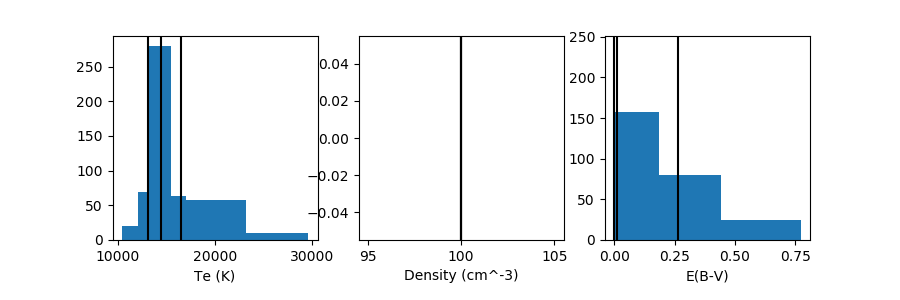

<IPython.core.display.Javascript object>


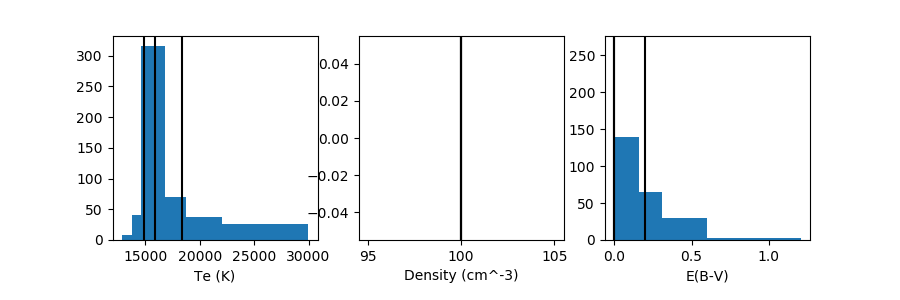

<IPython.core.display.Javascript object>


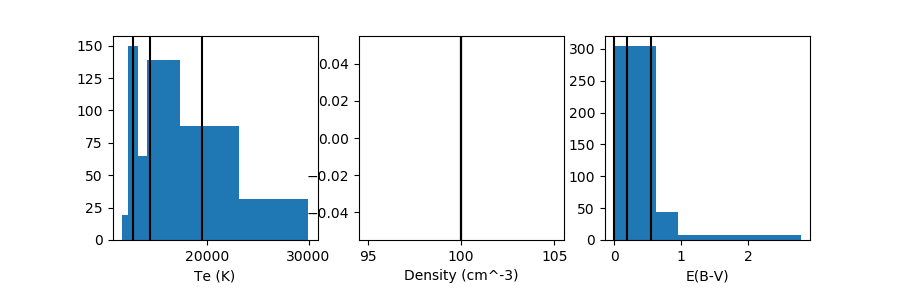

<IPython.core.display.Javascript object>


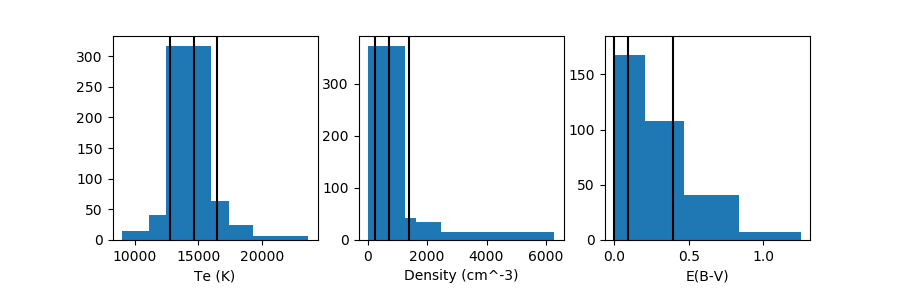

<IPython.core.display.Javascript object>


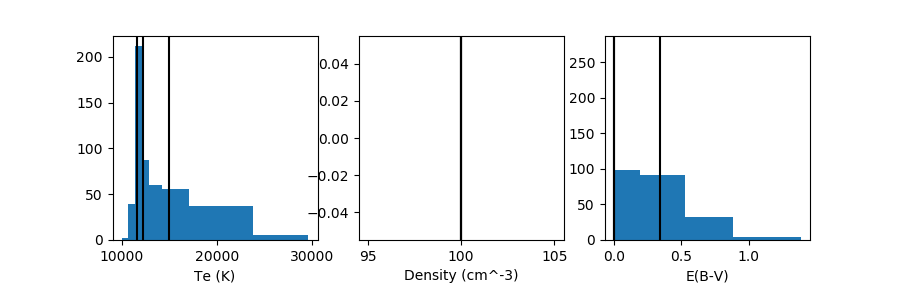

<IPython.core.display.Javascript object>


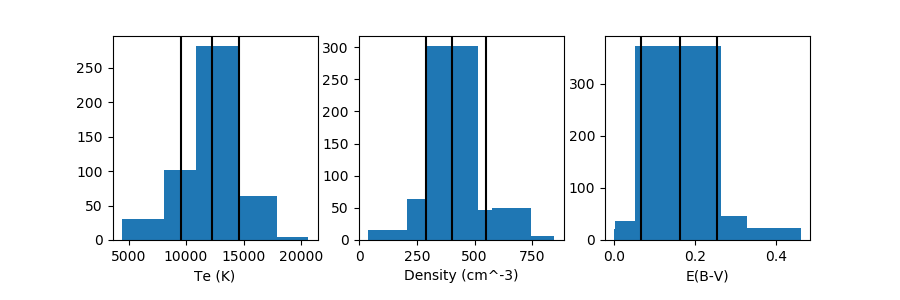

<IPython.core.display.Javascript object>


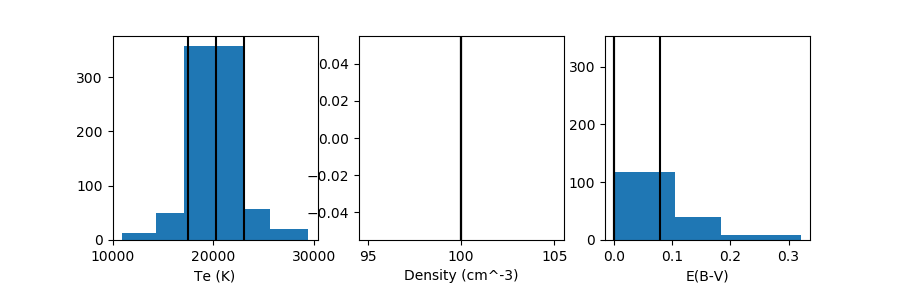

<IPython.core.display.Javascript object>


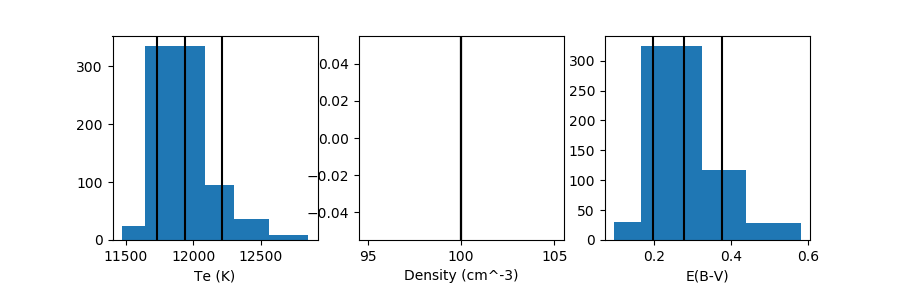

<IPython.core.display.Javascript object>


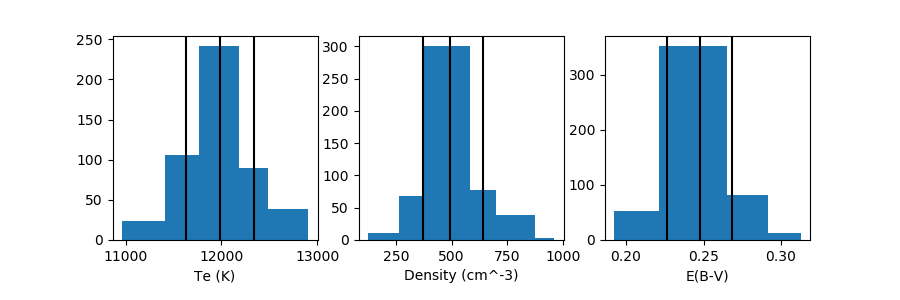

<IPython.core.display.Javascript object>


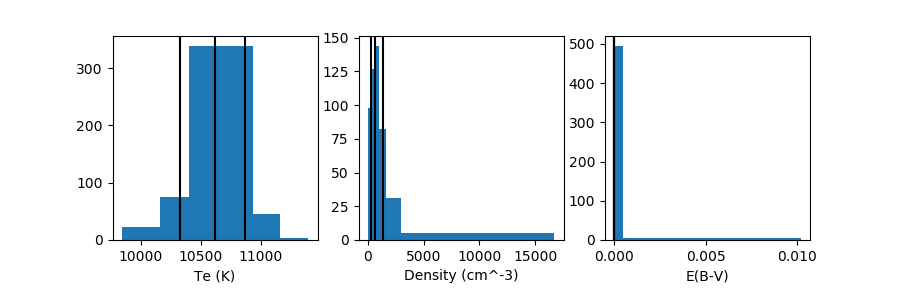

<IPython.core.display.Javascript object>


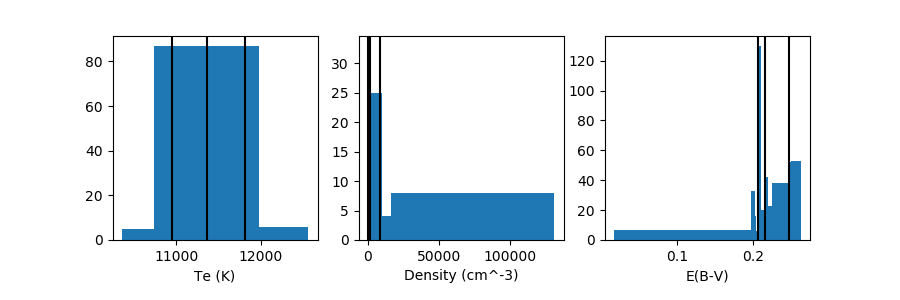

<IPython.core.display.Javascript object>


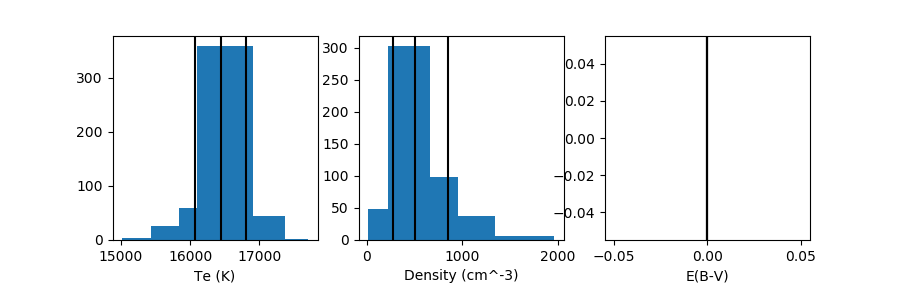

<IPython.core.display.Javascript object>


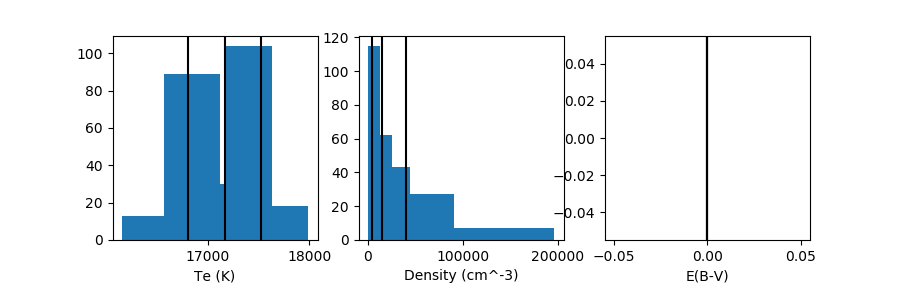

In [10]:
# Plot and save results
from astropy.visualization import hist
import glob
import re 
import pickle

temperature = {}
densities = {}
extinctions = {}
uptemperature = {}
updensities = {}
upextinctions = {}
lowtemperature = {}
lowdensities = {}
lowextinctions = {}

output = glob.glob('tem_and_ebv_samples/*pickle')
for f in output:

    #Open file
    out = pickle.load( open( f, "rb" ) )
    MC_tem = out['tem']
    MC_den = out['den']
    MC_ebv = out['ebv']

    # Save results
    g = re.sub('_tem_and_ebv.pickle','',f)
    g = re.sub('tem_and_ebv_samples/','',g)
    temperature[g],uptemperature[g],lowtemperature[g]  = np.array(np.percentile(MC_tem,(50,84,16)))
    densities[g],updensities[g],lowdensities[g]       = np.percentile(MC_den,(50,84,16))
    extinctions[g],upextinctions[g],lowextinctions[g]  = np.percentile(MC_ebv,(50,84,16))
    
    # Plotting
    fig, ax = plt.subplots(1,3,figsize=(9,3))
    fig.set_label(f.strip('_tem_and_ebv.pickle'))
    fig.subplots_adjust(bottom=0.2)
    
    hist(MC_tem,bins='blocks',ax=ax[0])
    ax[0].set_xlabel('Te (K)')
    ax[0].axvline(temperature[g],color='k')
    ax[0].axvline(uptemperature[g],color='k')
    ax[0].axvline(lowtemperature[g],color='k')
    
    hist(MC_den,bins='blocks',ax=ax[1])
    ax[1].set_xlabel('Density (cm^-3)')
    ax[1].axvline(densities[g],color='k')
    ax[1].axvline(updensities[g],color='k')
    ax[1].axvline(lowdensities[g],color='k')
    
    hist(MC_ebv,bins='blocks',ax=ax[2])
    ax[2].set_xlabel('E(B-V)')
    ax[2].axvline(extinctions[g],color='k')
    ax[2].axvline(upextinctions[g],color='k')
    ax[2].axvline(lowextinctions[g],color='k')

In [11]:
# Save in a file
Te = Table([temperature.keys(),
            temperature.values(),uptemperature.values(),lowtemperature.values(),
            densities.values(),updensities.values(),lowdensities.values(),
            extinctions.values(),upextinctions.values(),lowextinctions.values()], 
          names=('Name','Te','upTe','lowTe','Den','upDen','lowDen','EBV','upEBV','lowEBV'))  
Te.write('data_Te.dat',format='ascii.fixed_width_two_line')
Te.show_in_notebook()

idx,Name,Te,upTe,lowTe,Den,upDen,lowDen,EBV,upEBV,lowEBV
0,the_Lynx_arc,17164.6437597,17522.8269119,16801.7164352,15608.6864727,39980.1659963,5006.69369267,0.0,0.0,0.0
1,BX660,15898.3586496,18376.1228229,14866.2307402,100.0,100.0,100.0,0.0,0.201689062295,0.0
2,COSMOS_12805,12299.5996496,15005.5870808,11573.426427,100.0,100.0,100.0,0.0,0.342230764692,0.0
3,COSMOS-1908,14651.6825718,16485.3121506,12765.1400903,697.027833501,1369.70690002,245.062481814,0.0914412307101,0.391799399284,0.0
4,S16-stack,11982.2364869,12339.9543175,11628.2830583,493.194765681,640.004629289,370.14423269,0.24786555689,0.268540365645,0.226167227308
5,SMACS_0304,11364.9075093,11809.6705502,10950.7948567,1163.23812198,8634.27170235,256.262416918,0.215364338122,0.247614592202,0.206005607878
6,BX418,14409.1526924,16554.3370834,13089.3885361,100.0,100.0,100.0,0.0124894281649,0.263704556499,0.0
7,A1689_31.1,20191.799489,24539.0678867,16800.8523479,225.353338369,418.953410786,99.4539138393,0.268112932242,0.602886283474,0.0
8,SMACS_2031,16443.9423411,16810.9856428,16064.7177106,501.835902647,848.06529175,269.528044758,0.0,0.0,0.0
9,RCSGA,11938.5644848,12208.6371485,11730.4183784,100.0,100.0,100.0,0.279197409042,0.37805765064,0.197145385898


## Comparing with published results

<IPython.core.display.Javascript object>


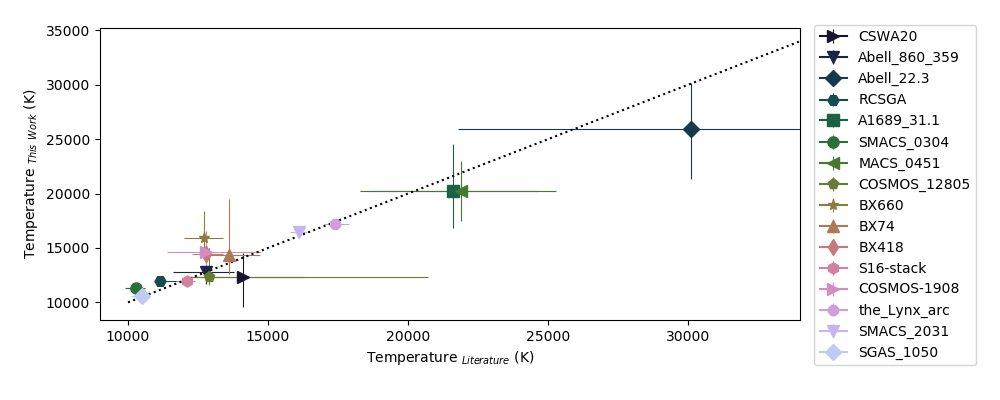

(1238.1008597097177, 1122.0264596142511)
(24.845876783001586, 4172.9952427455246)


In [12]:
# Load data
literature = Table.read('../Data/galaxy_properties.dat',format='ascii.fixed_width_two_line')
diff = []

fig, ax = plt.subplots(1,1,figsize=(10,4))
fig.subplots_adjust(top=0.93,bottom=0.2,right=0.8,left=0.1)

# Direct temperature 
for k,gal in enumerate(literature):
        
    diff.append(np.abs(gal['Te']-temperature[gal['Name']]))
    upper_error = uptemperature[gal['Name']]-temperature[gal['Name']]
    lower_error = temperature[gal['Name']]-lowtemperature[gal['Name']]
    
    ax.errorbar(gal['Te'],temperature[gal['Name']],
                xerr=np.array((np.abs(gal['infTe']),gal['supTe'])).reshape(2,1),
                yerr=np.array((lower_error,upper_error)).reshape(2,1),
                color=colors[gal['nb']],marker=gal['marker'],markersize=8,elinewidth=0.8,
                label=gal['Name'])

print(np.nanmean(diff),np.nanstd(diff))
print(np.nanmin(diff),np.nanmax(diff))

ax.set_xlabel('Temperature $_{Literature}$ (K)')
ax.set_ylabel('Temperature $_{This\,\,\,Work}$ (K)')
ax.plot(range(10000,35000,1000),range(10000,35000,1000),color='k',linestyle=':',linewidth=1.5)
ax.set_xlim(9000,34000)
#bbox_to_anchor=(1.25, 1.08)
plt.legend(fontsize=10,bbox_to_anchor=(1.01, 1.035))
fig.savefig('/Users/vera/Desktop/direct_Te_lit_comparision.pdf',format='pdf')

## De-redden fluxes 

In [13]:
# Using the E(B-V) error bars except when there is negative values. 
#Normalise to Hb, not to have to worry about units
fluxes = Table.read('../Data/data.dat',format='ascii.fixed_width_two_line')

data = []
edata =[]
name = []
err = []

# Loop in galaxies
for gal in fluxes:
   
    name.append(gal['Name'])
    ext = extinctions[gal['Name']]
    eext = np.mean((upextinctions[gal['Name']],lowextinctions[gal['Name']]))
    err.append(eext)
    
    # Set up redenning law
    if ext >0 :
        rc = pn.RedCorr(law='CCM89') 
        rc.R_V = 4.05 # Calzetti 2000
        rc.E_BV = ext

        # Deredden line using the obs class
        dered_fluxes = [0] * 17
        dered_errors = [0] * 17
        for i,line in enumerate(line_names):
            corr = rc.getCorr(super_wav[line])
            corr_err = rc.getErrCorr(super_wav[line],eext)
            dered_fluxes[i] = gal[line]* corr
            dered_errors[i] = np.sqrt((gal['e'+line]/gal[line])**2  + (corr_err/corr))
        
    else:
        print('Not correcting for',gal['Name'])
        dered_fluxes = [0] * 17
        dered_errors = [0] * 17
        for i,line in enumerate(line_names):
            dered_fluxes[i] = gal[line]
            dered_errors[i] = gal['e'+line]

    data.append(dered_fluxes)
    edata.append(dered_errors)
    
## save all data in single file    
data2 = np.array(data).T
edata2 = np.array(edata).T

dered_fluxes = Table([name,extinctions.values(),err,
                      data2[0],data2[1],data2[2],data2[3],data2[4],data2[5],data2[6],data2[7],data2[8],
                      data2[9],data2[10],data2[11],data2[12],data2[13],data2[14],data2[15],data2[16],
                      edata2[0],edata2[1],edata2[2],edata2[3],edata2[4],edata2[5],edata2[6],edata2[7],edata2[8],
                      edata2[9],edata2[10],edata2[11],edata2[12],edata2[13],edata2[14],edata2[15],edata2[16]],
          names=('Name','E(B-V)','eE(B-V)',
                 'OIII1661','OIII1666','NIII1750','CIII1907','CIII1909','NeIII3869','OII3727','OII3729','OIITot',
                 'Hd','Hg','OIII4363','Hb','OIII4959','OIII5007','Ha','NII6584',
                 'eOIII1661','eOIII1666','eNIII1750','eCIII1907','eCIII1909','eNeIII3869','eOII3727','eOII3729',
                 'eOIITot','eHd','eHg','eOIII4363','eHb','eOIII4959','eOIII5007','eHa','eNII6584'))   

dered_fluxes.write('data_dered.dat',format='ascii.fixed_width_two_line')
dered_fluxes.show_in_notebook()

('Not correcting for', 'Abell_22.3')
('Not correcting for', 'MACS_0451')
('Not correcting for', 'COSMOS_12805')
('Not correcting for', 'BX660')
('Not correcting for', 'the_Lynx_arc')
('Not correcting for', 'SMACS_2031')
('Not correcting for', 'SGAS_1050')


idx,Name,E(B-V),eE(B-V),OIII1661,OIII1666,NIII1750,CIII1907,CIII1909,NeIII3869,OII3727,OII3729,OIITot,Hd,Hg,OIII4363,Hb,OIII4959,OIII5007,Ha,NII6584,eOIII1661,eOIII1666,eNIII1750,eCIII1907,eCIII1909,eNeIII3869,eOII3727,eOII3729,eOIITot,eHd,eHg,eOIII4363,eHb,eOIII4959,eOIII5007,eHa,eNII6584
0,CSWA20,0.0,0.161025823687,0.125518073726,0.313703532067,nan,0.402755083111,0.369779855978,0.8542610925,1.10214748957,1.21915727026,1.10193060966,nan,1.22733620276,0.107256542479,1.98371773696,3.26733188876,9.66040948186,5.52286617357,0.099632709863,1.02892321161,0.467637814623,nan,0.255023767168,0.257567472781,0.247545910036,0.245632354776,0.248698380047,0.489489420176,nan,0.255051259967,0.645980038673,0.245971158072,0.242535978853,0.241792484249,0.229984560112,0.400362207978
1,Abell_860_359,0.0,0.0509723273098,0.0422417770783,0.116858700767,0.0422728006925,nan,nan,nan,nan,nan,1.54853230121,nan,nan,nan,1.22749737011,2.48153375706,7.46666063033,3.45858457535,nan,nan,0.366694453593,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0970142847801,0.0926982918155,0.0926081374049,0.0822698957286,nan
2,Abell_22.3,0.0,0.310288163187,nan,nan,nan,nan,nan,nan,nan,nan,1.11,nan,nan,0.27,1.0,1.98,6.45,5.03,0.05,nan,nan,nan,nan,nan,nan,nan,nan,0.3,nan,nan,0.1,0.1,0.3,0.3,0.4,nan
3,RCSGA,0.0914412307101,0.287601518269,nan,nan,nan,nan,nan,32.8153288283,nan,nan,311.002245756,28.2748930312,50.3833267201,5.56207717935,105.039705689,156.080041547,497.765762268,277.962868419,17.6778103473,nan,nan,nan,nan,nan,0.354960684212,nan,nan,0.312132739891,0.39639270511,0.351334250528,nan,0.324798401197,0.325184034086,0.323912621968,0.324028223766,0.362128129944
4,A1689_31.1,0.24786555689,0.301443141737,21.0908326708,48.749062984,nan,34.6109210428,67.1886245268,25.4325133424,37.5087338591,47.6858474955,85.1824113382,nan,60.2136231138,21.8243673201,132.116373078,190.533140255,632.792376232,nan,nan,0.319170020911,0.2964920731,nan,0.298283945799,0.289059425137,0.507198389509,0.333871329107,0.33141441029,0.33246729235,nan,0.350559081787,0.438244194992,0.351012936207,0.372311856553,0.333380275997,nan,nan
5,SMACS_0304,0.215364338122,0.22681010004,0.0636726052554,0.104564528225,nan,nan,nan,0.908139093801,2.70751586913,3.63051382099,6.49189290197,0.746216380128,1.13784816623,nan,2.47754776348,3.25725163935,11.3684635091,7.07199071594,0.227084446847,0.348505436195,0.32525889387,nan,nan,nan,12.6783898038,3.8936990755,3.3332888396,0.287916234925,0.28921214243,0.288931472809,nan,0.288203157321,0.287912480721,0.287738384479,0.279135050662,0.282284704213
6,MACS_0451,0.0124894281649,0.0395132980353,0.2,0.3,0.1,nan,nan,nan,nan,nan,0.63,nan,nan,nan,1.0,1.37,3.95,2.58,0.065,0.1,0.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.05,0.05,0.16,nan
7,COSMOS_12805,0.268112932242,0.171115382346,0.049,0.075,0.042,nan,nan,nan,nan,nan,2.9,nan,nan,nan,1.0,1.89,6.46,2.84,0.1,0.012,0.015,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.3,0.42,0.29,0.05,nan
8,BX660,0.0,0.100844531147,0.0,0.21,nan,nan,nan,nan,nan,nan,0.87,nan,nan,nan,1.0,3.2,6.4,2.77,0.07,0.0,0.04,nan,nan,nan,nan,nan,nan,0.04,nan,nan,nan,0.2,0.8,0.3,0.2,nan
9,BX74,0.279197409042,0.272952674586,0.0,0.44050390128,nan,nan,nan,nan,nan,nan,2.66221965637,nan,nan,nan,2.17956582853,5.29954630901,16.8244605808,6.17282175634,0.21365177741,nan,0.321931148595,nan,nan,nan,nan,nan,nan,0.319270363605,nan,nan,nan,0.433095750499,0.689794300266,0.336025242282,0.306248402883,0.388504882938


## Tables for paper

It is a bit cumbersome, but just repeat the same normalising to Hb so that I don't have to worry about units in line fluxes

In [14]:
fluxes = Table.read('../Data/data.dat',format='ascii.fixed_width_two_line')

data = []
edata =[]
name = []
err = []

# Loop in galaxies
for gal in fluxes:
   
    name.append(gal['Name'])
    ext = extinctions[gal['Name']]
    eext = np.mean((upextinctions[gal['Name']],lowextinctions[gal['Name']]))
    err.append(eext)
    
    # Set up redenning law
    if ext >0 :
        rc = pn.RedCorr(law='CCM89') 
        rc.R_V = 4.05 # Calzetti 2000
        rc.E_BV = ext

        # Deredden line using the obs class
        dered_fluxes = [0] * 17
        dered_errors = [0] * 17
        for i,line in enumerate(line_names):
            corr = rc.getCorr(super_wav[line])
            corr_err = rc.getErrCorr(super_wav[line],eext)
            dered_fluxes[i] = gal[line]* corr
            dered_errors[i] = np.sqrt((gal['e'+line]/gal[line])**2  + (corr_err/corr))
        
    else:
        print('Not correcting for',gal['Name'])
        dered_fluxes = [0] * 17
        dered_errors = [0] * 17
        for i,line in enumerate(line_names):
            dered_fluxes[i] = gal[line]
            dered_errors[i] = gal['e'+line]
            
    # Normalise to Hb
    norm,err_norm = dered_fluxes[12],dered_errors[12] # Hb index=12
    if norm != 1.00:
        print('Normalizing',gal['Name'])
        dered_errors = [x/norm * np.sqrt((err_norm/norm)**2+(ex/x)**2) for x,ex in zip(dered_fluxes,dered_errors)]
        dered_fluxes /= norm

    data.append(dered_fluxes)
    edata.append(dered_errors)
    
## save all data in single file    
data2 = np.array(data).T
edata2 = np.array(edata).T

dered_fluxes = Table([name,extinctions.values(),err,
                      data2[0],data2[1],data2[2],data2[3],data2[4],data2[5],data2[6],data2[7],data2[8],
                      data2[9],data2[10],data2[11],data2[12],data2[13],data2[14],data2[15],data2[16],
                      edata2[0],edata2[1],edata2[2],edata2[3],edata2[4],edata2[5],edata2[6],edata2[7],edata2[8],
                      edata2[9],edata2[10],edata2[11],edata2[12],edata2[13],edata2[14],edata2[15],edata2[16]],
          names=('Name','E(B-V)','eE(B-V)',
                 'OIII1661','OIII1666','NIII1750','CIII1907','CIII1909','NeIII3869','OII3727','OII3729','OIITot',
                 'Hd','Hg','OIII4363','Hb','OIII4959','OIII5007','Ha','NII6584',
                 'eOIII1661','eOIII1666','eNIII1750','eCIII1907','eCIII1909','eNeIII3869','eOII3727','eOII3729',
                 'eOIITot','eHd','eHg','eOIII4363','eHb','eOIII4959','eOIII5007','eHa','eNII6584'))   

dered_fluxes.write('data_dered_hb_norm.dat',format='ascii.fixed_width_two_line')
dered_fluxes.show_in_notebook()

('Normalizing', 'CSWA20')
('Normalizing', 'Abell_860_359')
('Not correcting for', 'Abell_22.3')
('Normalizing', 'RCSGA')
('Normalizing', 'A1689_31.1')
('Normalizing', 'SMACS_0304')
('Not correcting for', 'MACS_0451')
('Not correcting for', 'COSMOS_12805')
('Not correcting for', 'BX660')
('Normalizing', 'BX74')
('Normalizing', 'BX418')
('Normalizing', 'S16-stack')
('Normalizing', 'COSMOS-1908')
('Not correcting for', 'the_Lynx_arc')
('Not correcting for', 'SMACS_2031')
('Normalizing', 'SMACS_2031')
('Not correcting for', 'SGAS_1050')


idx,Name,E(B-V),eE(B-V),OIII1661,OIII1666,NIII1750,CIII1907,CIII1909,NeIII3869,OII3727,OII3729,OIITot,Hd,Hg,OIII4363,Hb,OIII4959,OIII5007,Ha,NII6584,eOIII1661,eOIII1666,eNIII1750,eCIII1907,eCIII1909,eNeIII3869,eOII3727,eOII3729,eOIITot,eHd,eHg,eOIII4363,eHb,eOIII4959,eOIII5007,eHa,eNII6584
0,CSWA20,0.0,0.161025823687,0.0632741601222,0.158139198044,nan,0.203030439063,0.18640749593,0.430636413933,0.555596932484,0.614582028254,0.555487602461,nan,0.618705060651,0.0540684495987,1.0,1.64707499857,4.86985083708,2.7840988013,0.0502252452588,0.518743616746,0.236552183792,nan,0.131000212183,0.131882025971,0.135733120471,0.141698448367,0.146713387541,0.256186376511,nan,0.149720572814,0.325710111517,0.175355465759,0.238029124439,0.616016523833,0.364162320498,0.201920241996
1,Abell_860_359,0.0,0.0509723273098,0.0344129267457,0.0952007748544,0.03443820062,nan,nan,nan,nan,nan,1.26153614575,nan,nan,nan,1.0,2.02162042663,6.08283228308,2.81759021205,nan,nan,0.298828131398,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.111771251508,0.176725015946,0.486635627062,0.232553374956,nan
2,Abell_22.3,0.0,0.310288163187,nan,nan,nan,nan,nan,nan,nan,nan,1.11,nan,nan,0.27,1.0,1.98,6.45,5.03,0.05,nan,nan,nan,nan,nan,nan,nan,nan,0.3,nan,nan,0.1,0.1,0.3,0.3,0.4,nan
3,RCSGA,0.0914412307101,0.287601518269,nan,nan,nan,nan,nan,0.312408804016,nan,nan,2.96080652281,0.269182904177,0.479659823776,0.0529521397922,1.0,1.48591468839,4.73883431989,2.64626473006,0.168296457339,nan,nan,nan,nan,nan,0.00351466256761,nan,nan,0.00962543013782,0.00386444537267,0.00365887220075,nan,0.00437295878733,0.00554031484117,0.0149741448947,0.00874481341441,0.00348659085771
4,A1689_31.1,0.24786555689,0.301443141737,0.159638295992,0.368985780098,nan,0.26197298818,0.508556380722,0.192500844141,0.283906778434,0.360938212157,0.644752874708,nan,0.455762005199,0.165190481782,1.0,1.44216145067,4.78965900659,nan,nan,0.00245277391653,0.00244895463959,nan,0.00236258764456,0.00257149691497,0.0038729456948,0.00263727124939,0.00268555212364,0.003044181022,nan,0.00291664973109,0.00334601584434,0.00375734849048,0.0047563256469,0.0129731644326,nan,nan
5,SMACS_0304,0.215364338122,0.22681010004,0.0256998497442,0.0422048485874,nan,nan,nan,0.366547562549,1.09282085659,1.46536582443,2.62028970649,0.301191521362,0.459263866879,nan,1.0,1.31470790891,4.58859509258,2.85443163607,0.0916569400578,0.140697241234,0.131374360238,nan,nan,nan,5.1174916165,1.5767269627,1.35615395484,0.326209393997,0.121877787658,0.128274581063,nan,0.164509770431,0.192076719463,0.546261402255,0.350638237092,0.114434923351
6,MACS_0451,0.0124894281649,0.0395132980353,0.2,0.3,0.1,nan,nan,nan,nan,nan,0.63,nan,nan,nan,1.0,1.37,3.95,2.58,0.065,0.1,0.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.05,0.05,0.16,nan
7,COSMOS_12805,0.268112932242,0.171115382346,0.049,0.075,0.042,nan,nan,nan,nan,nan,2.9,nan,nan,nan,1.0,1.89,6.46,2.84,0.1,0.012,0.015,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.3,0.42,0.29,0.05,nan
8,BX660,0.0,0.100844531147,0.0,0.21,nan,nan,nan,nan,nan,nan,0.87,nan,nan,nan,1.0,3.2,6.4,2.77,0.07,0.0,0.04,nan,nan,nan,nan,nan,nan,0.04,nan,nan,nan,0.2,0.8,0.3,0.2,nan
9,BX74,0.279197409042,0.272952674586,0.0,0.202106261492,nan,nan,nan,nan,nan,nan,1.2214449417,nan,nan,nan,1.0,2.43146879972,7.71917982954,2.83213366421,0.0980249252455,nan,0.153066563124,nan,nan,nan,nan,nan,nan,0.283488259814,nan,nan,nan,0.281014629677,0.577577485824,1.54158628402,0.580041438483,0.179309842869


In [15]:
## Write it to paper 
dered_gal = Table.read('data_dered_hb_norm.dat',format='ascii.fixed_width_two_line')

shorten_line_names1 = ['OIII1661','OIII1666','CIII1907','CIII1909','NeIII3869','OIITot','Hd']
shorten_line_names2 = ['Hg','OIII4363','Hb','OIII4959','OIII5007','Ha','NII6584']

fancy_line_names = ['OIII] $\lambda$1661','OIII] $\lambda$1666','[CIII] $\lambda$1907',
                    'CIII] $\lambda$1909','[NeIII] $\lambda$3869','[OII] Sum','H$\delta$','H$\gamma$',
                    '[OIII] $\lambda$4363','H$\\beta$','[OIII] $\lambda$4959',
                    '[OIII] $\lambda$5007','H$\\alpha$','[NII] $\lambda$6584']

out = open('dered_fluxes_for_paper','w')

out.write('Obj          \t')
for name in fancy_line_names:
    out.write(name+'\t& ')
out.write('\n')

for f in dered_gal:
    out.write("%s \t"%f['Name'])
    for line in shorten_line_names1:
        out.write("&%0.3f$\pm$%0.3f\t"%(f[line],f['e'+line]))
    out.write('\\\\ \n')

out.write('\n\n SECOND TABLE \n\n')
    
for f in dered_gal:
    out.write("%s \t"%f['Name'])
    for line in shorten_line_names2:
        out.write("&%0.3f$\pm$%0.3f\t"%(f[line],f['e'+line]))
    out.write('\\\\ \n')
      
out.close()

In [ ]:
### BPT with rederenned fluxes

<IPython.core.display.Javascript object>


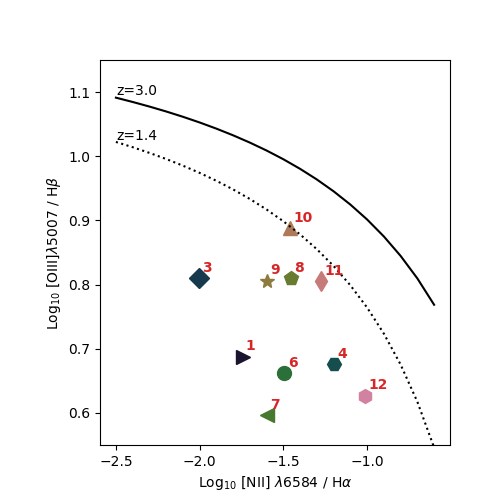

In [16]:
# Load data
fluxes = Table.read('data_dered.dat',format='ascii.fixed_width_two_line')
sample = Table.read('../Data/galaxy_properties.dat',format='ascii.fixed_width_two_line')
sample.add_index('Name')

## colors and markers
colors = plt.get_cmap('cubehelix')(np.linspace(0.1, 0.8, len(sample['Name'])))

#plotting
fig, ax = plt.subplots(1,1,figsize=(5,5))
fig.subplots_adjust(left=0.2)
for k,gal in enumerate(fluxes):
    nb = sample.loc[gal['Name']]['nb']
    ax.plot(np.log10(gal['NII6584']/gal['Ha']),np.log10(gal['OIII5007']/gal['Hb']),
            color=colors[nb],marker=sample.loc[gal['Name']]['marker'],markersize=10)
    ax.annotate(nb+1,(np.log10(gal['NII6584']/gal['Ha'])+0.02,np.log10(gal['OIII5007']/gal['Hb'])+0.01),
                   color='C3',fontsize=10,fontweight='bold')

    
# Kewley+13 
def BPT(nii_ha,z):
    return 0.61/(nii_ha - 0.02 - 0.1833 * z) +1.2 + 0.03 *z

ax.plot(np.arange(-2.5,-0.5,0.1),BPT(np.arange(-2.5,-0.5,0.1),z=1.4),color='k',linestyle=':')
ax.plot(np.arange(-2.5,-0.5,0.1),BPT(np.arange(-2.5,-0.5,0.1),z=3.0),color='k')
ax.annotate('z=1.4',xy=(-2.5,1.025))
ax.annotate('z=3.0',xy=(-2.5,1.095))


ax.set_ylabel('Log$_{10}$ [OIII]$ \lambda$5007 / H$\\beta$')
ax.set_xlabel('Log$_{10}$ [NII] $\lambda$6584 / H$\\alpha$')
ax.set_ylim(0.55,1.15)#
plt.savefig('/Users/vera/Desktop/BPT.pdf')

# Old stuff

## I've tried to speed it up by parallelising, but my computer kept crashing. 

### Functions for MC
from astropy.visualization import hist
import multiprocessing as mtp
import pickle

#### Import data
fluxes = Table.read('../Data/direct_Te_data.dat',format='ascii.fixed_width_two_line')
fluxes.remove_rows(12) # SOMETHING WRONG WITH THIS GALAXY 
diagnostics = [4,2,4,4,4,5,2,3,4,4,2,3,3,5,3]

#### RSCAS issue (only upper limit)
fluxes[13]['eOIII4363'] = fluxes[13]['OIII4363']*0.2

#### Monte Carlo stuff
MC_steps = 50
t_precision = 50 

def multiproc(i,f,diag,MC_ebv_dict,MC_tem_dict,MC_den_dict):
    f2 = perturbed_lines(f)
    init_tem = 0
    new_tem,new_den,code = calculate_tem_den(f2,select=diag)
    c=0
    while np.abs(init_tem-new_tem) > t_precision and c<6:
        c+=1
        init_tem = new_tem
        dered_f,ebv = dered_line_fluxes(f2,init_tem,new_den)
        new_tem,new_den,code = calculate_tem_den(dered_f,select=diag)

    # Keep values
    MC_ebv_dict[i] = float(ebv)
    MC_tem_dict[i] = float(new_tem)
    MC_den_dict[i] = float(new_den)

for f,diag in zip(fluxes,diagnostics):

    print('**************** GALAXY: %s ****************'%f['Name'])
    manager = mtp.Manager()
    MC_ebv_dict = manager.dict()
    MC_tem_dict = manager.dict()
    MC_den_dict = manager.dict()
    
    jobs = []
    for i in range(MC_steps):
        proc = mtp.Process(target=multiproc,args=(i,f,diag,MC_ebv_dict,MC_tem_dict,MC_den_dict))
        jobs.append(proc)
        proc.start()
    
    for result in jobs:
        result.join()
        
    # turn into array and clean from nan
    MC_tem = MC_tem_dict.values()
    MC_ebv = MC_ebv_dict.values()
    MC_den = MC_den_dict.values()
    MC_tem = np.array(MC_tem)[~np.isnan(MC_tem)]
    MC_ebv = np.array(MC_ebv)[~np.isnan(MC_ebv)]
    MC_den = np.array(MC_den)[~np.isnan(MC_den)]

    # Printing results
    print('Temperature: %d +/- %d K'%(np.mean(MC_tem),np.std(MC_tem)))
    print('Density : %d +/- %d cm^-3'%(np.mean(MC_den),np.std(MC_den)))
    print('E(B-V): %0.3f +/- %0.3f\n\n'%(np.mean(MC_ebv),np.std(MC_ebv)))

    # Dump to file
    with open(f['Name']+'_tem_and_ebv.pickle', 'wb') as fp:
        out = {}
        out['tem'] = MC_tem
        out['den'] = MC_den
        out['ebv'] = MC_ebv
        pickle.dump(out, fp)